### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

** Due Date: December 7, 6pm**
BEFORE the beginning of class at 6:00pm
NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://cp.inkrefuge.com/images%5Cpressreleases/shark%20tank_large.jpg" width="400px"> 

After the previous 3 case studies,  your team is now equipped with the three powerful skills of data science: Hacking skill, Business skill and Math skill. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a better service/solution on any data you like, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include all the three components of data science: 1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how much are you evaluating the company; How are you planing to persuade the sharks to invest in your business; 2) the mathematical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and develop the prototype/demo.
* NOTE, as opposed to the first three case studies, case study 4 is much more open ended.  
  * Business is the focus
  * All three parts need to appear (Business, Computer Science, and Math)
  * However, the precise balance is up to you.

# Background about Elevator Pitch (90 seconds) and Shark Tank

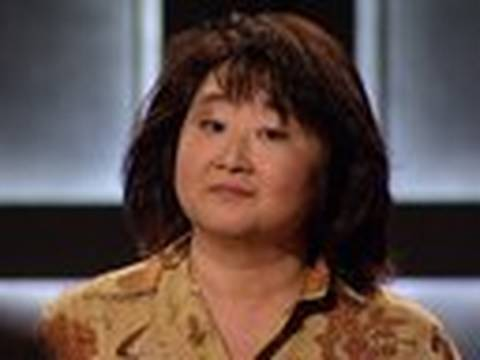

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

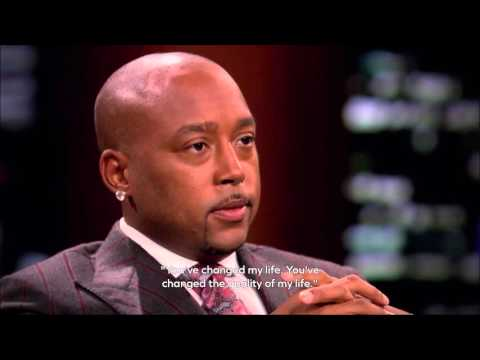

In [2]:
YouTubeVideo("xIq8Sg59UdY") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:

Help restaurant owners get better preparation for rush hours and make wiser business decision (such as expanding), and customers who is making reservation or on the way to a restaurant has better experience (less waiting time).

2) Why the problem is important to solve? 
When customers visiting a restaurant, they don’t want to wait because time is valuable. Neither do restaurant owners. Because the longer they keep customers waiting, the more likely they will lose their business, while on the other hand it is also not wise to prepare more than enough food, which means a waste of cost.

3) What is your idea to solve the problem? 
Based on discussions above, the ideal scenario would be, customers walks into a restaurant, and the restaurant is just ready to serve them with what they want, no more, no less. This win-win situation is hard to reach, but fortunately with the help of carefully collected data and machine learning methods we are able to create a product that helps customers and restaurants with information they need to be there. 
To be more specific, our model predicts how many visitors a restaurant is expected to have in a given time.

4) What differences you could make with your data science approach?
The logic behind that is, number of customers directly affects the amount of food ingredients to prepare and staff working schedules. Ideally, a restaurant can make most efficient use of food ingredients and lower labor cost if customer visits can be precisely predicted. However in the reality, it is very difficult to make such prediction, due to many unexpected factors, like weather, local competitors. In this case study, we try to take all these factors into consideration and predict numbers of future visitors for local restaurants in Japan, based on historical data from a restaurant reservation website AirREGI and a restaurant rating website Hot Pepper Gourmet.

5) Why do you believe the idea deserves the investment of the "sharks"?
The whole point of modern catering is to makes it possible for people to have better food while spend less time in kitchen, and all practitioners from restaurant owners to kitchen staff earn livings from the business. Also, food got efficient use of. Our product will make the lives of customers, chef, waiters and restaurant owners much easier, while money as well as time and food are saved. So it is worth investment.





### Problem 2: The Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.


**Insert your answers here**


1) Problem formulation in Math:

Our goal is to predict the number of visitors of each restaurant in future dates based on history data. We have data consists of multivariate time series and these can be treated as multiple features for training and predicting.

2) Math Solution:

We will develop a Long Short-Term Memory (LSTM) recurrent neural network model using Keras with Tensorflow backend.

3) Implementation of the Solution


In [40]:
import pandas as pd
import numpy as np
np.random.seed(10)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, LSTM

from matplotlib import pyplot


In [12]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # Forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [63]:
def train_model(train_X, train_y, test_X, test_y):
    multi_model = Sequential()
    multi_model.add(LSTM(4, input_shape=(train_X.shape[1], train_X.shape[2])))
    multi_model.add(Dense(1))
    multi_model.compile(loss='mse', optimizer='adam')
    multi_history = multi_model.fit(train_X, train_y, epochs=5,
                                    batch_size=100, validation_data=(test_X, test_y),
                                    verbose=1, shuffle=False)

In [38]:
def RMSE(y, pred):
    return mean_squared_error(y, pred)**0.5

### Problem 3: The Hacking Part  (20 points)


* Data Collection
* Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

In [49]:
# Data Processing
data = {
    'tra': pd.read_csv('data/air_visit_data.csv'),
    'as': pd.read_csv('data/air_store_info.csv'),
    'hs': pd.read_csv('data/hpg_store_info.csv'),
    'ar': pd.read_csv('data/air_reserve.csv'),
    'hr': pd.read_csv('data/hpg_reserve.csv'),
    'id': pd.read_csv('data/store_id_relation.csv'),
    'hol': pd.read_csv('data/date_info.csv').rename(columns={'calendar_date':'visit_date'})
    }

data['hr'] = pd.merge(data['hr'], data['id'], how='inner', on=['hpg_store_id'])


In [50]:
for df in ['ar','hr']:
    data[df]['visit_datetime'] = pd.to_datetime(data[df]['visit_datetime'])
    data[df]['visit_datetime'] = data[df]['visit_datetime'].dt.date
    data[df]['reserve_datetime'] = pd.to_datetime(data[df]['reserve_datetime'])
    data[df]['reserve_datetime'] = data[df]['reserve_datetime'].dt.date    
    data[df]['reserve_datetime_diff'] = data[df].apply(lambda r: (r['visit_datetime'] - r['reserve_datetime']).days, axis=1)
    data[df] = data[df].groupby(['air_store_id','visit_datetime'], as_index=False)[['reserve_datetime_diff', 'reserve_visitors']].sum().rename(columns={'visit_datetime':'visit_date'})

In [51]:
data['tra']['visit_date'] = pd.to_datetime(data['tra']['visit_date'])
data['tra']['dow'] = data['tra']['visit_date'].dt.dayofweek
data['tra']['year'] = data['tra']['visit_date'].dt.year
data['tra']['month'] = data['tra']['visit_date'].dt.month
data['tra']['visit_date'] = data['tra']['visit_date'].dt.date

In [52]:
stores = pd.concat([pd.DataFrame({'air_store_id': unique_stores, 'dow': [i]*len(unique_stores)}) for i in range(7)], axis=0, ignore_index=True).reset_index(drop=True)

tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].min().rename(columns={'visitors':'min_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow']) 
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].mean().rename(columns={'visitors':'mean_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].median().rename(columns={'visitors':'median_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].max().rename(columns={'visitors':'max_visitors'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])
tmp = data['tra'].groupby(['air_store_id','dow'], as_index=False)['visitors'].count().rename(columns={'visitors':'count_observations'})
stores = pd.merge(stores, tmp, how='left', on=['air_store_id','dow'])

In [53]:
stores = pd.merge(stores, data['as'], how='left', on=['air_store_id']) 
lbl = LabelEncoder()
stores['air_genre_name'] = lbl.fit_transform(stores['air_genre_name'])
stores['air_area_name'] = lbl.fit_transform(stores['air_area_name'])

data['hol']['visit_date'] = pd.to_datetime(data['hol']['visit_date'])
data['hol']['day_of_week'] = lbl.fit_transform(data['hol']['day_of_week'])
data['hol']['visit_date'] = data['hol']['visit_date'].dt.date
train = pd.merge(data['tra'], data['hol'], how='left', on=['visit_date']) 

In [55]:
train = pd.merge(data['tra'], stores, how='left', on=['air_store_id','dow']) 

for df in ['ar','hr']:
    train = pd.merge(train, data[df], how='left', on=['air_store_id','visit_date']) 
    
train = train.fillna(-1)

In [56]:
train.head()

,air_store_id,visit_date,visitors,dow,year,month,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,reserve_datetime_diff_x,reserve_visitors_x,reserve_datetime_diff_y,reserve_visitors_y
0,air_ba937bf13d40fb24,2016-01-13,25,2,2016,1,7.0,23.843750,25.0,57.0,64.0,4.0,62.0,35.658068,139.751599,-1.0,-1.0,-1.0,-1.0
1,air_ba937bf13d40fb24,2016-01-14,32,3,2016,1,2.0,20.292308,21.0,54.0,65.0,4.0,62.0,35.658068,139.751599,-1.0,-1.0,-1.0,-1.0
2,air_ba937bf13d40fb24,2016-01-15,29,4,2016,1,4.0,34.738462,35.0,61.0,65.0,4.0,62.0,35.658068,139.751599,-1.0,-1.0,-1.0,-1.0
3,air_ba937bf13d40fb24,2016-01-16,22,5,2016,1,6.0,27.651515,27.0,53.0,66.0,4.0,62.0,35.658068,139.751599,-1.0,-1.0,-1.0,-1.0
4,air_ba937bf13d40fb24,2016-01-18,6,0,2016,1,2.0,13.754386,12.0,34.0,57.0,4.0,62.0,35.658068,139.751599,-1.0,-1.0,-1.0,-1.0


In [57]:
train = train.sort_values('visit_date')
target_train = np.log1p(train['visitors'].values)

col = [c for c in train if c not in ['id', 'air_store_id', 'visitors']]

train = train[col]
train.set_index('visit_date', inplace=True)

train.head()

,dow,year,month,min_visitors,mean_visitors,median_visitors,max_visitors,count_observations,air_genre_name,air_area_name,latitude,longitude,reserve_datetime_diff_x,reserve_visitors_x,reserve_datetime_diff_y,reserve_visitors_y
visit_date,,,,,,,,,,,,,,,,
2016-01-01,4,2016,1,2.0,10.382353,10.0,20.0,68.0,2.0,3.0,33.581941,130.348436,-1.0,-1.0,-1.0,-1.0
2016-01-01,4,2016,1,20.0,41.500000,42.0,64.0,68.0,7.0,77.0,35.693840,139.703549,-1.0,-1.0,-1.0,-1.0
2016-01-01,4,2016,1,9.0,30.159420,24.0,139.0,69.0,2.0,73.0,35.669290,139.707056,-1.0,-1.0,-1.0,-1.0
2016-01-01,4,2016,1,9.0,25.434783,24.0,55.0,69.0,7.0,31.0,34.799767,135.360073,-1.0,-1.0,-1.0,-1.0
2016-01-01,4,2016,1,5.0,21.594203,18.0,69.0,69.0,12.0,79.0,35.699566,139.636438,-1.0,-1.0,-1.0,-1.0


In [58]:
train['visitors'] = target_train
values = train.values
values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [59]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),...,var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t)
1,0.666667,0.0,0.0,0.022556,0.076686,0.071895,0.023918,0.985714,0.214286,0.038835,...,0.985714,0.571429,0.757282,0.815045,0.968543,0.0,0.0,0.0,0.0,0.572149
2,0.666667,0.0,0.0,0.157895,0.286333,0.281046,0.074032,0.985714,0.571429,0.757282,...,1.000000,0.214286,0.718447,0.814500,0.968567,0.0,0.0,0.0,0.0,0.647807
3,0.666667,0.0,0.0,0.075188,0.209929,0.163399,0.159453,1.000000,0.214286,0.718447,...,1.000000,0.571429,0.310680,0.795186,0.938645,0.0,0.0,0.0,0.0,0.547655
4,0.666667,0.0,0.0,0.075188,0.178098,0.163399,0.063781,1.000000,0.571429,0.310680,...,1.000000,0.928572,0.776699,0.815172,0.968081,0.0,0.0,0.0,0.0,0.504241
5,0.666667,0.0,0.0,0.045113,0.152223,0.124183,0.079727,1.000000,0.928572,0.776699,...,1.000000,0.571429,0.320388,0.872246,0.976575,0.0,0.0,0.0,0.0,0.294479


In [60]:
reframed.drop(reframed.columns[[i for i in range(17,33)]], axis=1, inplace=True)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var17(t)
1,0.666667,0.0,0.0,0.022556,0.076686,0.071895,0.023918,0.985714,0.214286,0.038835,0.768135,0.904147,0.0,0.0,0.0,0.0,0.378435,0.572149
2,0.666667,0.0,0.0,0.157895,0.286333,0.281046,0.074032,0.985714,0.571429,0.757282,0.815045,0.968543,0.0,0.0,0.0,0.0,0.572149,0.647807
3,0.666667,0.0,0.0,0.075188,0.209929,0.163399,0.159453,1.000000,0.214286,0.718447,0.814500,0.968567,0.0,0.0,0.0,0.0,0.647807,0.547655
4,0.666667,0.0,0.0,0.075188,0.178098,0.163399,0.063781,1.000000,0.571429,0.310680,0.795186,0.938645,0.0,0.0,0.0,0.0,0.547655,0.504241
5,0.666667,0.0,0.0,0.045113,0.152223,0.124183,0.079727,1.000000,0.928572,0.776699,0.815172,0.968081,0.0,0.0,0.0,0.0,0.504241,0.294479


In [68]:
values = reframed.values
n_train_days = int(len(values) * 0.75)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# Split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(189080, 1, 17) (189080,) (63027, 1, 17) (63027,)


Train on 189080 samples, validate on 63027 samples
Epoch 1/10
189080/189080 [==============================] - 11s 56us/step - loss: 0.0180 - val_loss: 0.0218
Epoch 2/10
189080/189080 [==============================] - 9s 47us/step - loss: 0.0173 - val_loss: 0.0195
Epoch 3/10
189080/189080 [==============================] - 9s 46us/step - loss: 0.0172 - val_loss: 0.0185
Epoch 4/10
189080/189080 [==============================] - 11s 57us/step - loss: 0.0171 - val_loss: 0.0179
Epoch 5/10
189080/189080 [==============================] - 9s 47us/step - loss: 0.0171 - val_loss: 0.0177
Epoch 6/10
189080/189080 [==============================] - 9s 48us/step - loss: 0.0171 - val_loss: 0.0177
Epoch 7/10
189080/189080 [==============================] - 9s 48us/step - loss: 0.0170 - val_loss: 0.0176
Epoch 8/10
189080/189080 [==============================] - 9s 50us/step - loss: 0.0170 - val_loss: 0.0176
Epoch 9/10
189080/189080 [==============================] - 9s 48us/step - loss: 0.0170 - v

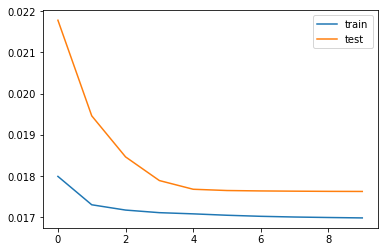

In [71]:
multi_model = Sequential()
multi_model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mse', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=10,
                                batch_size=100, validation_data=(test_X, test_y),
                                verbose=1, shuffle=False)
# plot history
pyplot.plot(multi_history.history['loss'], label='train')
pyplot.plot(multi_history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [72]:
yhat = multi_model.predict(test_X)

In [73]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# Invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [75]:
rmse = RMSE(inv_y, inv_yhat)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.797


*------------------------

### Problem 4: Prepare a 90 second Pitch and *present* it in the class (20 points)

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *



# Report: communicate the results (20 points)

(1) (5 points) What is your business proposition?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 10 minute presentation.

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 4 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **